### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import OneHotEncoder

## Step 1 : Data Exploration:

In [2]:
dataset="D:/Nexthike IT Solutions/Project-4 Feature Extraction and Price Prediction for Mobile Phones/Processed_Flipdata - Processed_Flipdata.csv"
df= pd.read_csv(dataset)
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

In [3]:
df.describe()

Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height  
count     541.000000  
mean       16.431201  
std         2.523553  
min         4.500000  
25%        16.510000  
50%        16.710000  
75%        16.940000  
max        41.940000

In [4]:
df.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999

In [5]:
df.tail()

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999

In [6]:
df.shape

(541, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


## Step 2 : Data Preprocessing

#### Check for N/A values,missing values,duplicate values, dropping unwanted column, identify unique values,& outliers for data:

In [8]:
# Checking for any N/A values
df.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [9]:
# Checking for any missing values
missing_value_df = df.isnull().sum()
print("\n missing value in dataset 1:\n",missing_value_df)


 missing value in dataset 1:
 Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [10]:
# Checking for any duplicates values
df.duplicated().sum()

0

In [11]:
# As Unnamed Column will not be participating in any prediction. So we can Drop it
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  Mobile Height                   Processor_   Prize  
0            5MP        1          16.76   Unisoc Spreadtrum SC9863A1   7,299  
1            5MP        1          16.76   Unisoc Spreadtrum SC9863A1   7,299  
2           16MP        0          16.64      Qualcomm Snapdragon 680  11,999  
3            5MP        0          16.56           Mediatek Helio A22   5,649  
4            5MP        1          16.76                          G37   8,999  
..           ...      ...            ...                          ...     ...  
536         12MP        0          15.49  Qualcomm Snapdragon 8 Gen 2  79,999  
537          2MP        0          12.70                    Octa Core   5,998  
538          8MP        0          16.76           MediaTek Helio G35   9,990  
539         32MP        0          16.26      Exynos 1380, Octa Core   38,999  
540          8MP        0          16.66           Mediatek Helio G35  15,999  

[541 rows x 11 columns]

In [12]:
df.describe()

Memory         RAM     Battery_     AI Lens  Mobile Height
count  541.000000  541.000000   541.000000  541.000000     541.000000
mean   110.550832    5.397412  4871.587800    0.062847      16.431201
std     60.600694    1.984923   780.148862    0.242911       2.523553
min     16.000000    2.000000   800.000000    0.000000       4.500000
25%     64.000000    4.000000  5000.000000    0.000000      16.510000
50%    128.000000    6.000000  5000.000000    0.000000      16.710000
75%    128.000000    8.000000  5000.000000    0.000000      16.940000
max    256.000000    8.000000  7000.000000    1.000000      41.940000

In [13]:
# Identify unique values
unique_values={col:df[col].nunique() for col in df.columns}
print("Unique Values:", unique_values)

Unique Values: {'Model': 187, 'Colour': 275, 'Memory': 5, 'RAM': 5, 'Battery_': 37, 'Rear Camera': 14, 'Front Camera': 13, 'AI Lens': 2, 'Mobile Height': 38, 'Processor_': 123, 'Prize': 158}


In [14]:
# Outliers Detection using IQR (Only for numeric columns) 
numeric_cols=df.select_dtypes(include=['number']).columns
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers Count Per Column:\n", outliers)

Outliers Count Per Column:
 Memory            55
RAM                0
Battery_         152
AI Lens           34
Mobile Height     33
dtype: int64


## Step 3 : Feature Extraction

### A Statistical Analysis 

#### To Find Mean, Median, & Mode per column

In [15]:
df.select_dtypes(include=['number']).mean()

Memory            110.550832
RAM                 5.397412
Battery_         4871.587800
AI Lens             0.062847
Mobile Height      16.431201
dtype: float64

In [16]:
df.select_dtypes(include=['number']).median()

Memory            128.00
RAM                 6.00
Battery_         5000.00
AI Lens             0.00
Mobile Height      16.71
dtype: float64

In [17]:
df.select_dtypes(include=['number']).mode()

Memory  RAM  Battery_  AI Lens  Mobile Height
0     128    4      5000        0          16.76

#### To Find Standard Deviation & Variance per column

In [18]:
df.select_dtypes(include=['number']).std()

Memory            60.600694
RAM                1.984923
Battery_         780.148862
AI Lens            0.242911
Mobile Height      2.523553
dtype: float64

In [19]:
df.select_dtypes(include=['number']).var()

Memory             3672.444171
RAM                   3.939919
Battery_         608632.246443
AI Lens               0.059006
Mobile Height         6.368318
dtype: float64

#### To Find Skewness per column

In [20]:
df.select_dtypes(include=['number']).skew()

Memory           1.029704
RAM              0.067617
Battery_        -3.304250
AI Lens          3.612638
Mobile Height    1.171778
dtype: float64

#### To Find Kurtosis per column

In [21]:
df.select_dtypes(include=['number']).kurt()

Memory            0.855888
RAM              -1.306301
Battery_         14.752188
AI Lens          11.092146
Mobile Height    48.220112
dtype: float64

### Visualizations

In [22]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 6
Integer variables: 0
Float variables: 1


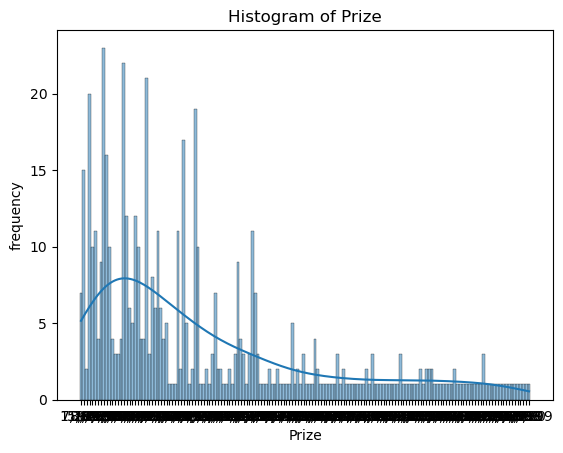

In [23]:
# By using histogram here we can see that the distribution of prize
variable=df['Prize']
sns.histplot(variable, bins=10, kde=True)
plt.title('Histogram of Prize')
plt.xlabel('Prize')
plt.ylabel('frequency')
plt.show()

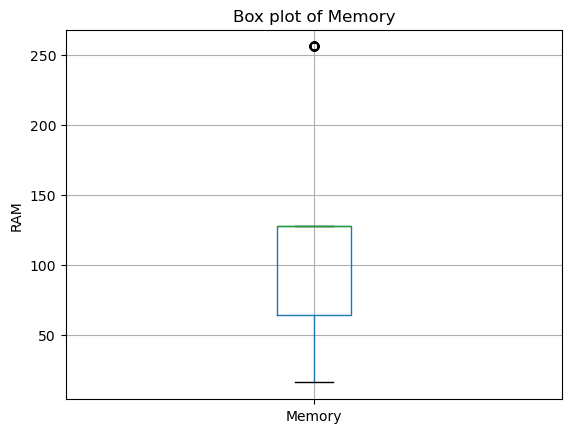

In [24]:
df.boxplot(column=['Memory'])
plt.title('Box plot of Memory')
plt.ylabel('RAM')
plt.show()

Text(0.5, 1.0, 'RAM vs Memory')

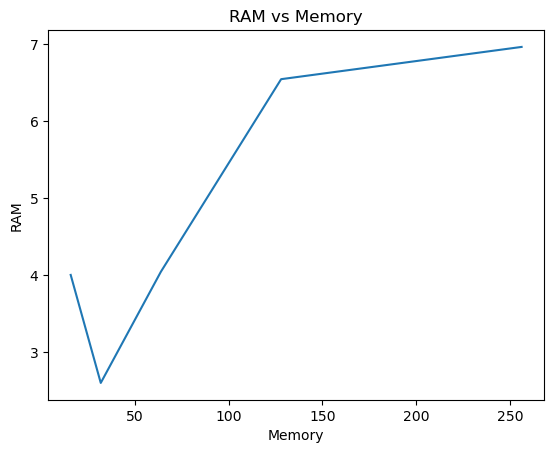

In [25]:
## We will check whether there is a relation between  the Memory & RAM
df.groupby('Memory')['RAM'].mean().plot()
plt.xlabel('Memory')
plt.ylabel('RAM')
plt.title("RAM vs Memory")

<Axes: >

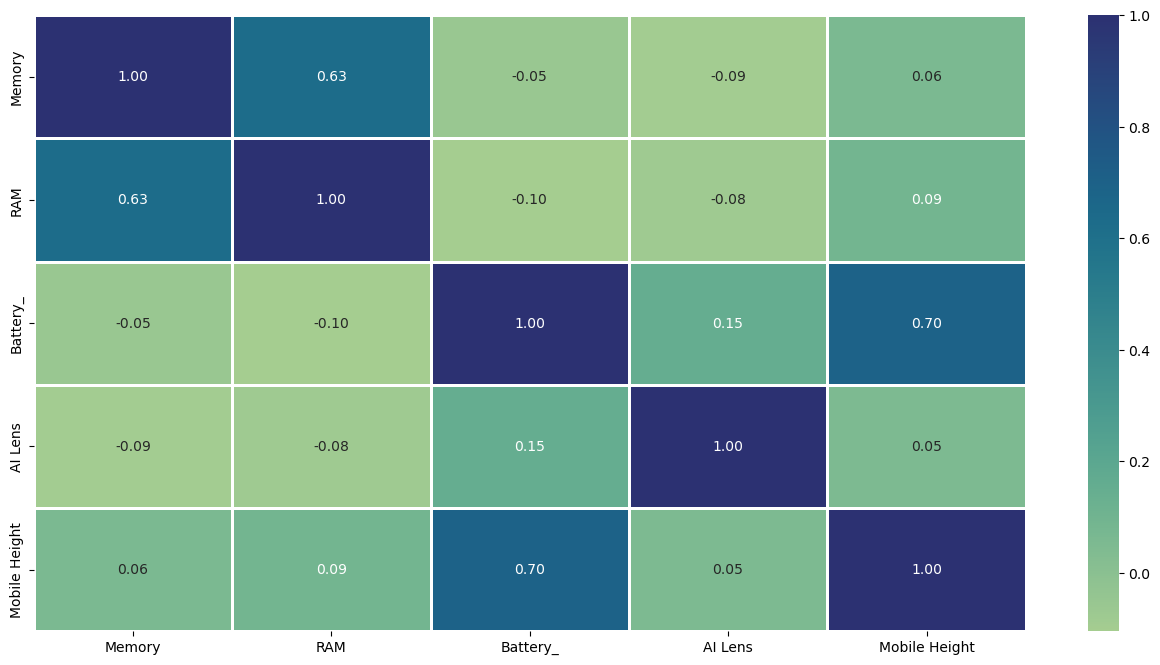

In [26]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 8))
sns.heatmap(numerical_df.corr(),
            cmap ='crest',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

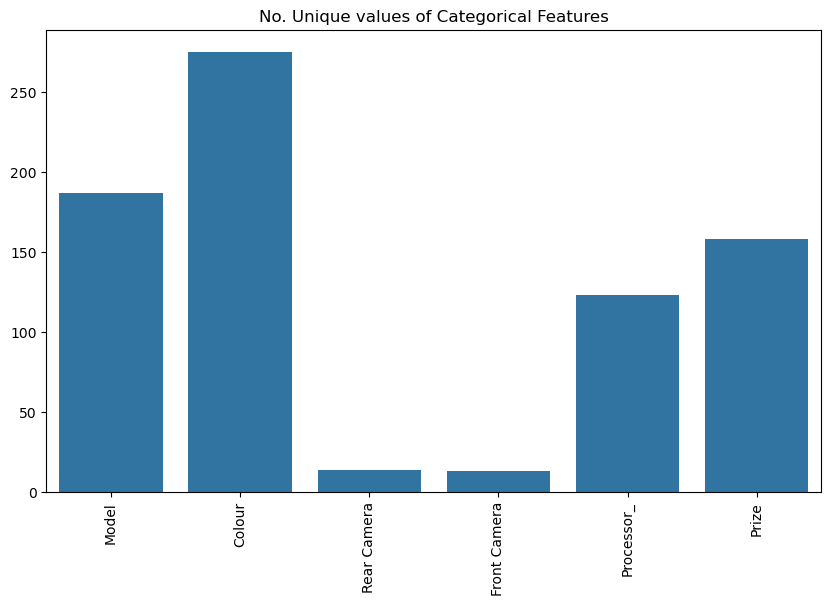

In [27]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<Axes: >

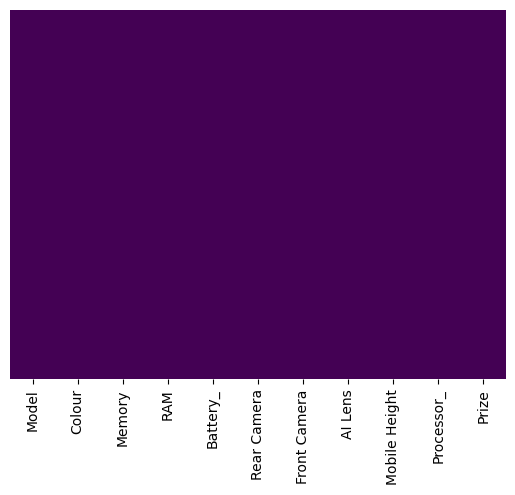

In [28]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### There is no null or missing values

<Axes: xlabel='Prize', ylabel='count'>

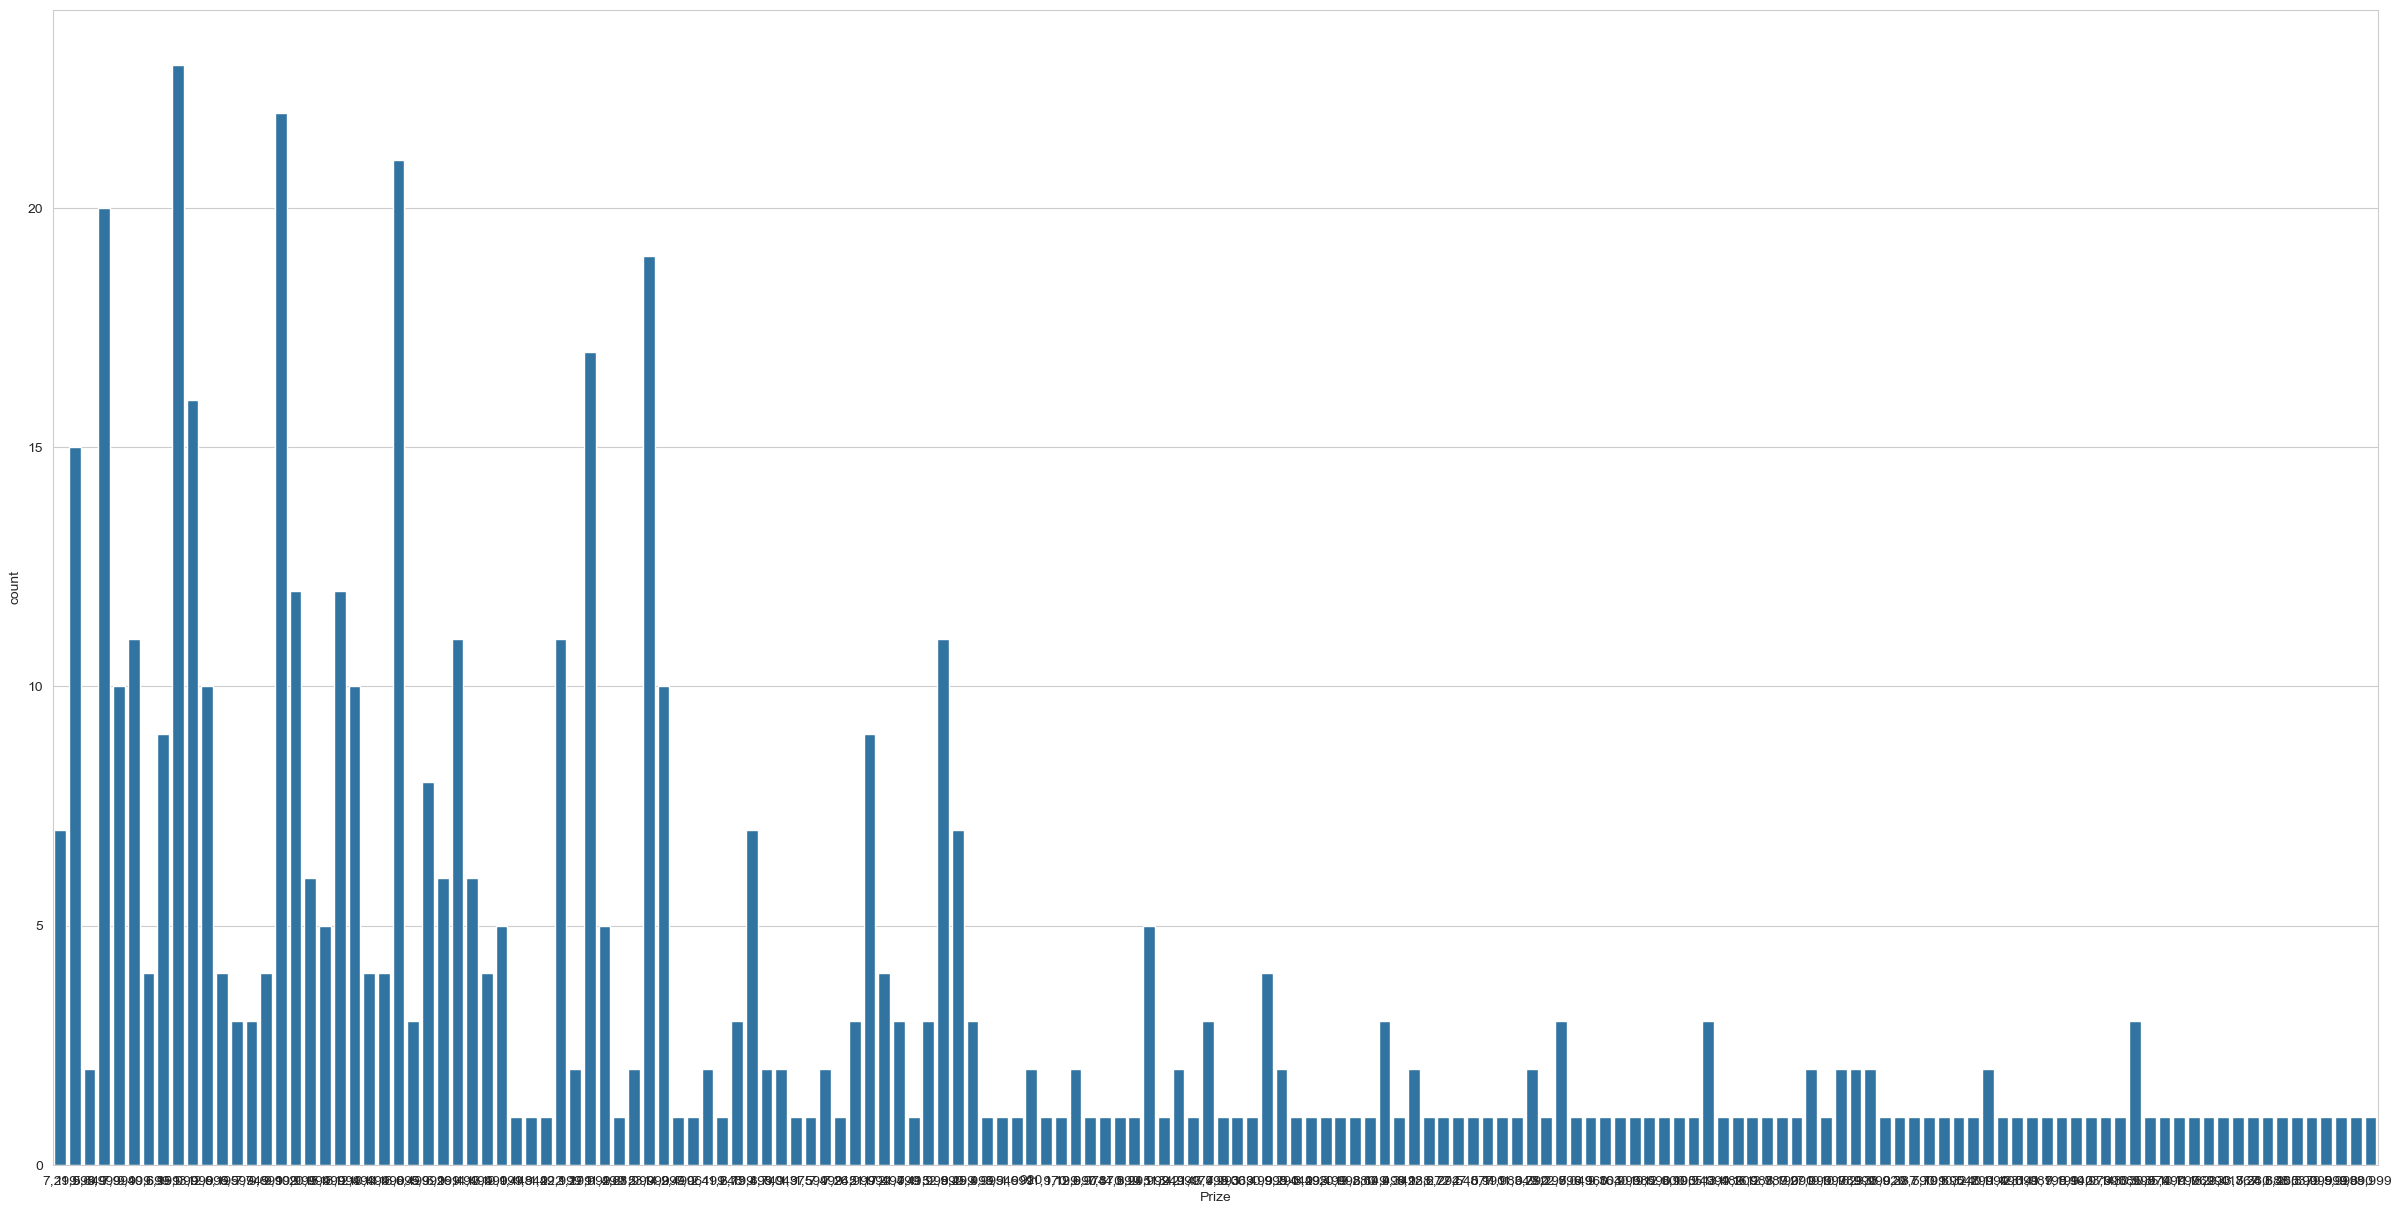

In [29]:
plt.figure(figsize=(30,15),)
sns.set_style('whitegrid')
sns.countplot(x='Prize',data=df)

<Axes: xlabel='RAM', ylabel='count'>

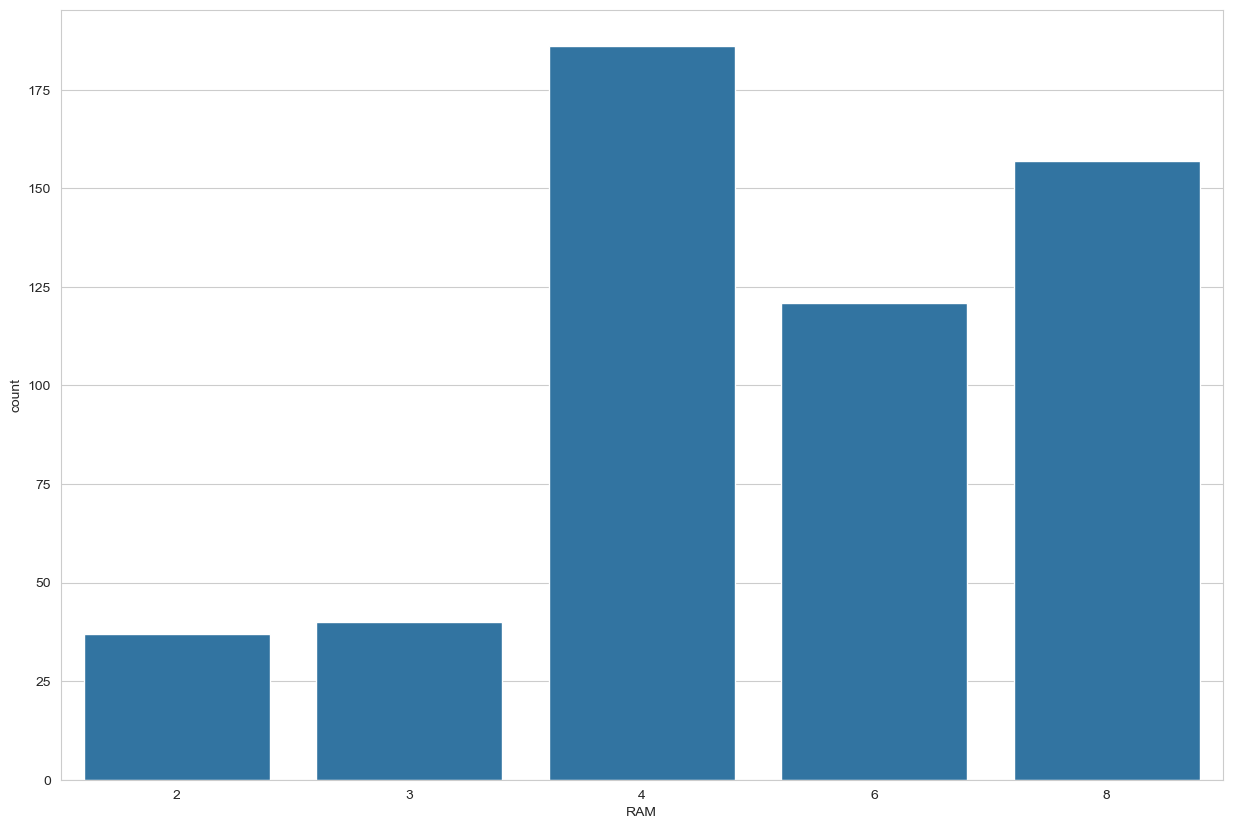

In [30]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

<Axes: xlabel='Front Camera', ylabel='count'>

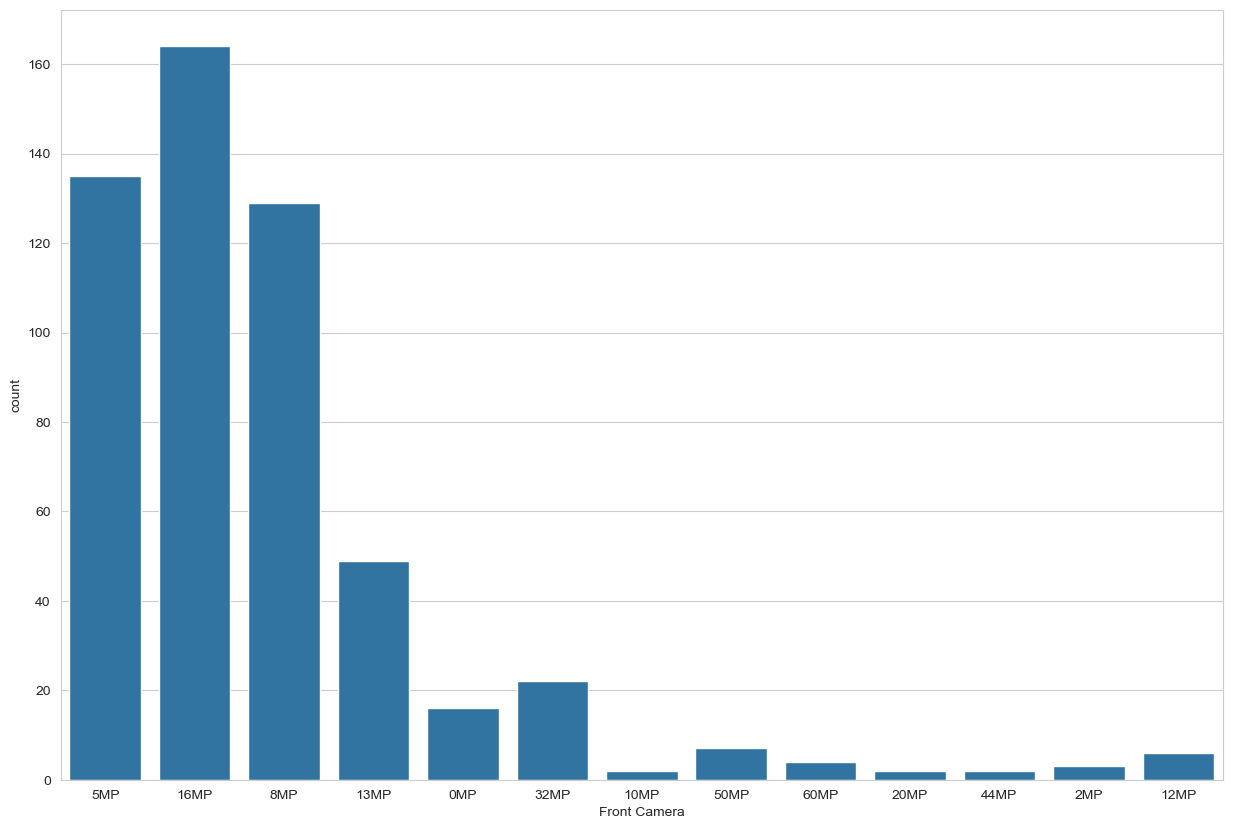

In [31]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Front Camera',data=df)

<Axes: xlabel='Rear Camera', ylabel='count'>

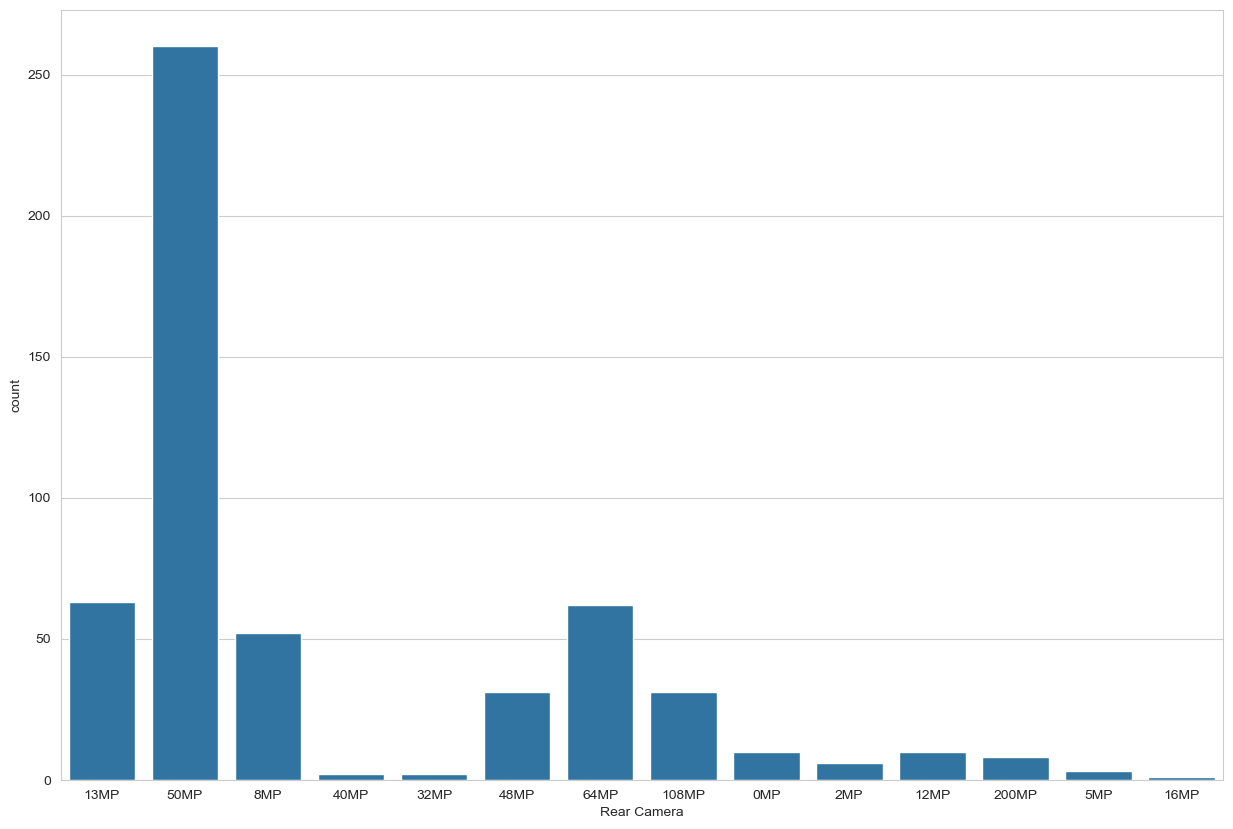

In [32]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Rear Camera',data=df)

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\3853553069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RAM'].dropna(),kde=False,color='red',bins=10)


<Axes: xlabel='RAM'>

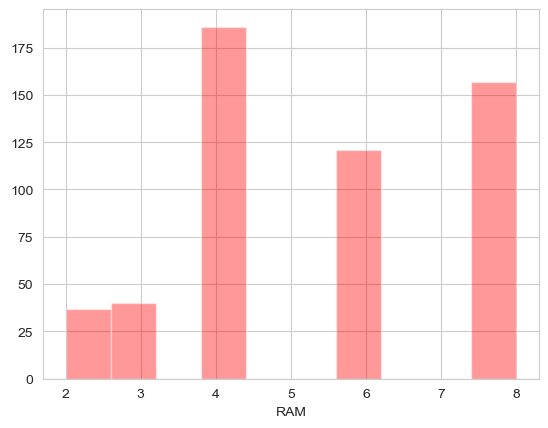

In [33]:
sns.distplot(df['RAM'].dropna(),kde=False,color='red',bins=10)

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\37447955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Battery_'].dropna(),kde=False,color='green',bins=10)


<Axes: xlabel='Battery_'>

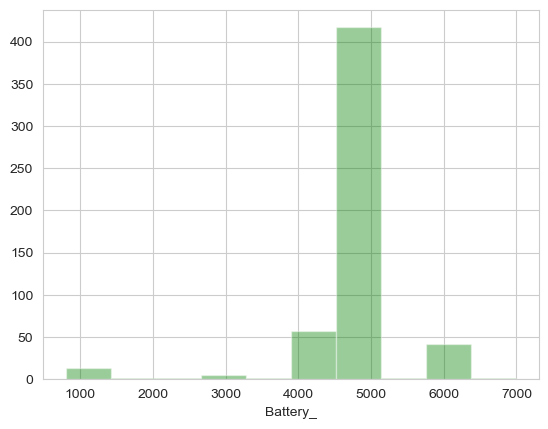

In [34]:
sns.distplot(df['Battery_'].dropna(),kde=False,color='green',bins=10)

In [35]:
print(df.dtypes)

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object


In [36]:
# Use the `replace()` function to remove symbols
df['Prize'] = df['Prize'].replace(',', '', regex=True)

#Convert the column to float
df['Prize'] = df['Prize'].astype(int)

print(df)

                     Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\2637430906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prize'] = df['Prize'].replace(',', '', regex=True)
C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\2637430906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prize'] = df['Prize'].astype(int)


C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\2587565607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Prize'].dropna(),kde=False,color='darkblue',bins=15)


<Axes: xlabel='Prize'>

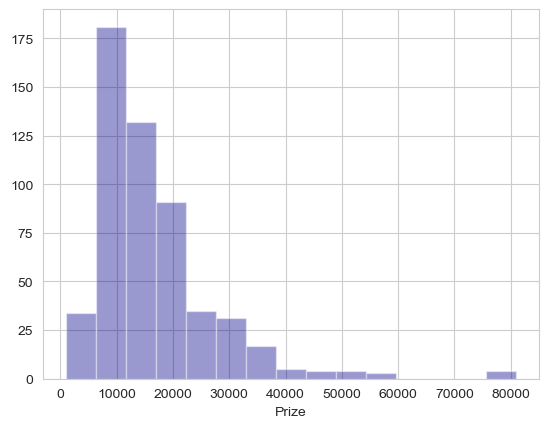

In [37]:
sns.distplot(df['Prize'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 1000x1000 with 0 Axes>

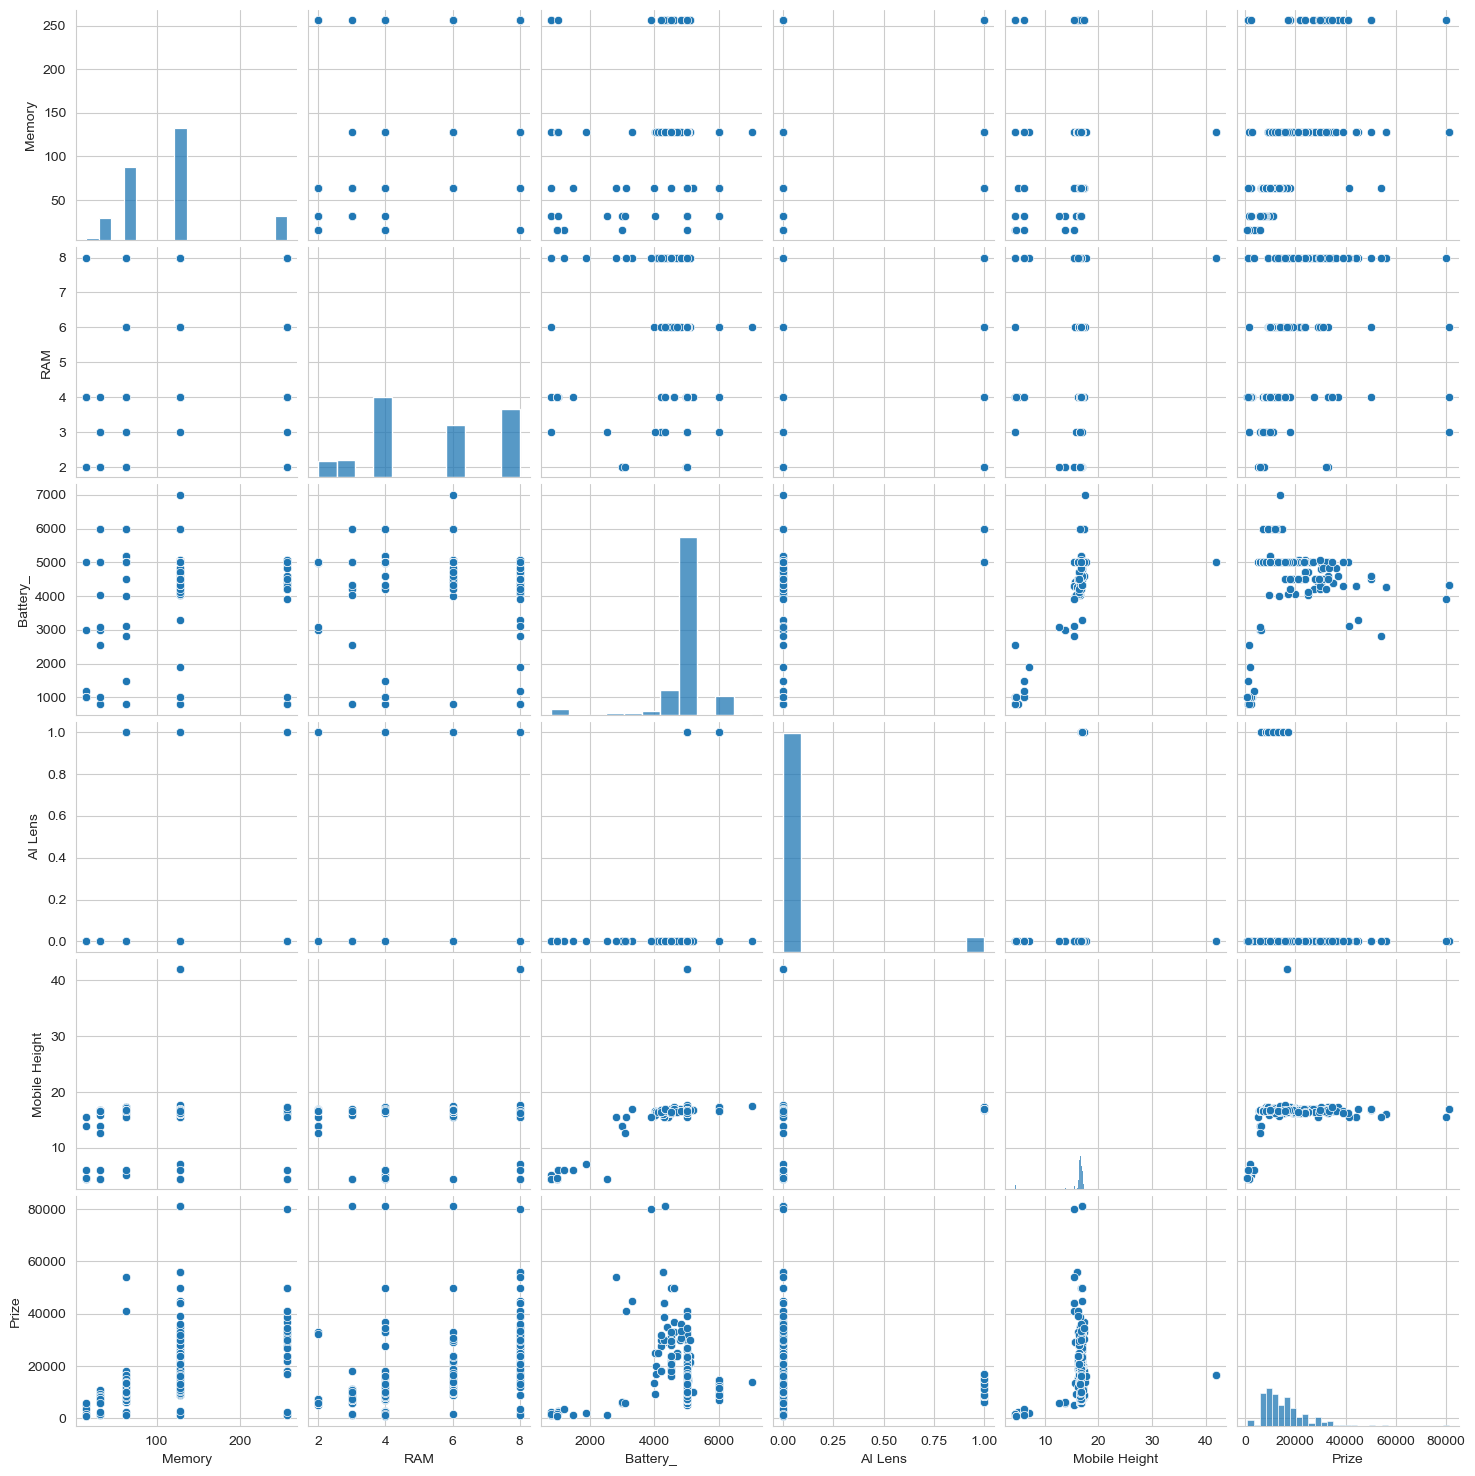

In [38]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

In [39]:
# Use the replace() function to remove symbols
df['Rear Camera'] = df['Rear Camera'].replace('MP', '', regex=True)
df['Front Camera'] = df['Front Camera'].replace('MP', '', regex=True)
# Convert the column to int
df['Rear Camera'] = df['Rear Camera'].astype(int)
df['Front Camera'] = df['Front Camera'].astype(int)
print(df)

                     Model          Colour  Memory  RAM  Battery_  \
0          Infinix SMART 7     Night Black      64    4      6000   
1          Infinix SMART 7      Azure Blue      64    4      6000   
2             MOTOROLA G32    Mineral Gray     128    8      5000   
3                 POCO C50      Royal Blue      32    2      5000   
4          Infinix HOT 30i        Marigold     128    8      5000   
..                     ...             ...     ...  ...       ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537               LAVA Z21            Cyan      32    2      3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76 

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\4193501785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rear Camera'] = df['Rear Camera'].replace('MP', '', regex=True)
C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\4193501785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].replace('MP', '', regex=True)
C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\4193501785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [40]:
df

Model          Colour  Memory  RAM  Battery_  \
0          Infinix SMART 7     Night Black      64    4      6000   
1          Infinix SMART 7      Azure Blue      64    4      6000   
2             MOTOROLA G32    Mineral Gray     128    8      5000   
3                 POCO C50      Royal Blue      32    2      5000   
4          Infinix HOT 30i        Marigold     128    8      5000   
..                     ...             ...     ...  ...       ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537               LAVA Z21            Cyan      32    2      3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76   
2             50            16        0          16.64   
3              8             5        0          16.56   
4             50             5        1          16.76   
..           ...           ...      ...            ...   
536           50            12        0          15.49   
537            5             2        0          12.70   
538           50             8        0          16.76   
539           50            32        0          16.26   
540           50             8        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 11 columns]

## Step 4: Model Building

#### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder = LabelEncoder()

In [43]:
encoder.fit(df['Model'])

LabelEncoder()

In [44]:
df['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [45]:
lbl_encode = LabelEncoder()
label_encoder = LabelEncoder()

In [46]:
lbl_encode.fit_transform(df['Model'])

array([ 23,  23,  37,  69,  12,  12,  12,  12,  12,  12,  83,  12,  23,
       112, 111,  70,  12,  70,  69,  40, 172, 172, 172, 172, 172, 172,
       172, 172,  27,  90,  90,  71,  90,  71,  71,  71, 112, 112,  44,
        75,  42,  83, 111,  37,  83, 112,  42,  44,  42,  71, 171, 171,
        39,  69, 171, 171,  78,  39,  75, 112, 112,  78,  40, 151, 151,
       113,  50, 151, 147, 147, 147, 147,  81,  90,  76,  39,  69,  78,
        86, 153, 153, 153, 153, 153, 153, 153, 153, 153,  39, 113, 113,
       113,  83,  86,  50,  78, 135, 135,  53,  78,  78,  77, 135, 135,
       135, 135,  69, 157, 130,  22,  22,  81, 113, 114,  83, 113, 128,
        36, 129,  75,  75,  83,  27,  27,  27, 156,  17,  81, 134, 138,
       113,  90, 113,  52, 156,   3,   3,  90,  10,  17, 154, 154, 134,
        97,  10,  98,  98,  98,  17,  98,  98,  10, 131, 115,  36, 130,
       131,  86,  86,  91,  43,  88,  97, 114,  47, 146,  82, 138, 134,
        40, 114,  74,  26,  26,  26,  82,  98,  97,  16, 149, 14

In [47]:
df['Model'] = label_encoder.fit_transform(df['Model'])

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\781175257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = label_encoder.fit_transform(df['Model'])


In [48]:
df['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [49]:
lbl_encode.fit_transform(df['Colour'])

array([159,  20, 149, 201, 130,  88, 151,  65,  65, 151, 210,  88,  71,
       267, 169, 201, 130, 186,  48,  46,  14, 131,  90, 131,  90,  90,
       131, 131,  94,  25, 119, 186, 120,  40,  81,  40, 161, 161, 133,
        40,  68,  35, 111, 207, 249, 247,   6, 117,   6, 186, 264, 162,
        84, 201, 162, 264, 273, 148, 186, 267, 247, 186,  50, 205,   3,
        86, 146, 160,  24, 114,  64,  64, 272, 119, 273, 148, 201, 104,
        79, 252, 199, 252, 198, 199, 198, 252, 198, 199,  84,  22,  22,
        22,  35, 180, 124, 104,  58, 156, 156, 186, 273, 273, 100,  58,
       156, 100,  48,  27,  27,  80, 218, 253,  86,   3, 175, 164, 164,
        67,  67, 273, 273, 145, 106, 212, 112, 197,   2, 113, 202, 222,
       164, 120, 164, 164, 196,  36,  37,  25,  28, 139, 238, 176,  39,
       248, 223,  85, 132, 154,  80, 132, 154, 195, 195,  56, 157, 157,
       157,  79, 180, 237,  34,  44, 101,  43,  11, 269,  99, 224,  39,
        46,  81, 273,  80,   4, 172,   8,  85, 126,  28,  57, 12

In [50]:
df['Colour'] = label_encoder.fit_transform(df['Colour'])

C:\Users\Jay_Ganesh\AppData\Local\Temp\ipykernel_12452\1900015637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Colour'] = label_encoder.fit_transform(df['Colour'])


In [51]:
df

Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0       23     159      64    4      6000           13             5        1   
1       23      20      64    4      6000           13             5        1   
2       37     149     128    8      5000           50            16        0   
3       69     201      32    2      5000            8             5        0   
4       12     130     128    8      5000           50             5        1   
..     ...     ...     ...  ...       ...          ...           ...      ...   
536    118      49     256    8      3900           50            12        0   
537     32      52      32    2      3100            5             2        0   
538    123     259      64    4      5000           50             8        0   
539    110      17     128    8      5000           50            32        0   
540     59     215     128    4      5000           50             8        0   

     Mobile Height                   Processor_  Prize  
0            16.76   Unisoc Spreadtrum SC9863A1   7299  
1            16.76   Unisoc Spreadtrum SC9863A1   7299  
2            16.64      Qualcomm Snapdragon 680  11999  
3            16.56           Mediatek Helio A22   5649  
4            16.76                          G37   8999  
..             ...                          ...    ...  
536          15.49  Qualcomm Snapdragon 8 Gen 2  79999  
537          12.70                    Octa Core   5998  
538          16.76           MediaTek Helio G35   9990  
539          16.26      Exynos 1380, Octa Core   38999  
540          16.66           Mediatek Helio G35  15999  

[541 rows x 11 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    int32  
 1   Colour         541 non-null    int32  
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    int32  
 6   Front Camera   541 non-null    int32  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(5), int64(4), object(1)
memory usage: 36.1+ KB


### Feature selection 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
X = df[['Model','Colour','Memory','RAM','AI Lens','Rear Camera','Front Camera']]
y = df.Prize

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### LinearRegression

In [56]:
linearmodel = LinearRegression()

In [57]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [58]:
linearmodel.score(X_test, y_test)

0.422680102480932

### DecisionTreeClassifier

In [59]:
dtmodel = DecisionTreeClassifier()

In [60]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
dtmodel.score(X_test, y_test)

0.5504587155963303

In [62]:
dt_pred = dtmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
classification_report(y_test, dt_pred)

C:\Users\Jay_Ganesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jay_Ganesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jay_Ganesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jay_Ganesh\anaconda3\Lib

'              precision    recall  f1-score   support\n\n         920       0.00      0.00      0.00         0\n        1199       0.00      0.00      0.00         1\n        1375       0.00      0.00      0.00         0\n        1599       0.00      0.00      0.00         1\n        1699       0.00      0.00      0.00         1\n        5649       0.00      0.00      0.00         1\n        5999       0.50      0.50      0.50         2\n        6299       0.00      0.00      0.00         4\n        6499       0.00      0.00      0.00         1\n        6599       0.25      1.00      0.40         1\n        6978       0.00      0.00      0.00         0\n        6999       1.00      1.00      1.00         2\n        7299       0.33      1.00      0.50         1\n        7499       0.00      0.00      0.00         0\n        7749       1.00      1.00      1.00         1\n        7961       0.00      0.00      0.00         1\n        7993       0.00      0.00      0.00         0\n       

In [65]:
confusion_matrix(y_test, dt_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [66]:
dtmodel.feature_importances_

array([0.44355252, 0.18157946, 0.03860276, 0.08662435, 0.01982981,
       0.1137695 , 0.1160416 ])

In [67]:
pd.DataFrame(index = X.columns, data = dtmodel.feature_importances_,
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)[:10]

Feature Importance
Model                   0.443553
Colour                  0.181579
Front Camera            0.116042
Rear Camera             0.113769
RAM                     0.086624
Memory                  0.038603
AI Lens                 0.019830

#### Random Forests

In [68]:
rfr = RandomForestRegressor(n_estimators=15, random_state= 42)

In [69]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [70]:
rfr.score(X_test, y_test)

0.7842521827023406

In [71]:
rfr_pred = rfr.predict(X_test)

In [72]:
rfr.feature_importances_

array([2.94083453e-01, 3.67889625e-02, 7.90463923e-02, 7.74790959e-02,
       8.14173147e-05, 5.82367916e-02, 4.54283887e-01])

In [73]:
linear_pred = linearmodel.predict(X_test)

### Step 5: Model Evaluation

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
mean_absolute_error(y_test, linear_pred)

4074.2286985366245

In [76]:
mean_squared_error(y_test, linear_pred)

79570727.91960436

In [77]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, linear_pred))

8920.242593091532

In [78]:
r2_score(y_test, linear_pred)

0.422680102480932

In [79]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rfr = RandomForestRegressor()
rfr.fit(X_train_pca, y_train)

RandomForestRegressor()

In [80]:
accuracy = rfr.score(X_test_pca, y_test)
accuracy

0.588744510918664

#### Model loading and final testing

In [81]:
final_model = RandomForestRegressor(n_estimators=15, random_state= 42)

In [82]:
final_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [83]:
from joblib import dump, load

In [84]:
dump(final_model, 'final_price_model.joblib')

['final_price_model.joblib']

In [85]:
loaded_model = load('final_price_model.joblib')

#### Putting some values in all the features for testing purpose and calculating the Price

In [86]:
input_features = X.head(5)

In [87]:
predicted_price = loaded_model.predict(input_features).round(decimals=0)
predicted_price

array([ 7842.,  7652., 16465.,  6377.,  9066.])

In [88]:
actual_price = y.head(5)
actual_price

0     7299
1     7299
2    11999
3     5649
4     8999
Name: Prize, dtype: int32

In [89]:
pd.DataFrame({'actual_price': actual_price, 'Predicted_price': predicted_price})

actual_price  Predicted_price
0          7299           7842.0
1          7299           7652.0
2         11999          16465.0
3          5649           6377.0
4          8999           9066.0

#### This is giving almost 90% results

## Step 6: Feature Importance Analysis

Text(0.5, 1.0, 'PointPlot for Actual and Predicted price')

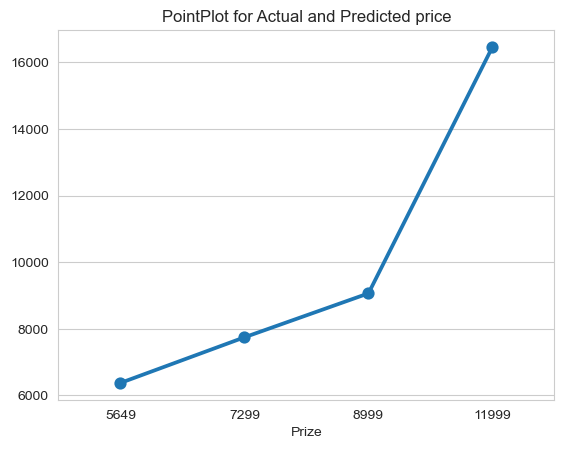

In [90]:
sns.pointplot(x=actual_price, y = predicted_price)
plt.title('PointPlot for Actual and Predicted price')

In [91]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'AI Lens', 'Rear Camera',
       'Front Camera'],
      dtype='object')

In [92]:
Coeff_analysis = pd.DataFrame(linearmodel.coef_, X.columns, columns = ['Coeff'])

In [93]:
Coeff_analysis.sort_values('Coeff', ascending = False)[:10]

Coeff
RAM           1185.646715
Front Camera   331.003717
Memory          46.294035
Rear Camera     10.250321
Colour           2.602514
Model          -33.686748
AI Lens      -5588.309313

### This is the most relevant features according to  RandomForestRegressor